## 데이콘 
- 기후변화가 감염병에 영향을 미치는것을 논문으로 확인
- 서울 전체적으로 감염병 예측
- 시계열 데이터로 예측해보자
- 기온, 습도, 대기오염, 예방 접종 비율, 의료 인프라 등 



In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os
import numpy as np
np.float_ = np.float64

Importing plotly failed. Interactive plots will not work.


## 계절성을 고려한 지수 평활법

Holt-Winters Model
MAE: 13.916655700478659
RMSE: 19.483965428077543
R²: 0.670599515127124


C:\Users\비트캠프\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\비트캠프\AppData\Local\Temp\ipykernel_16352\1356213281.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['yhat'] = forecast.values


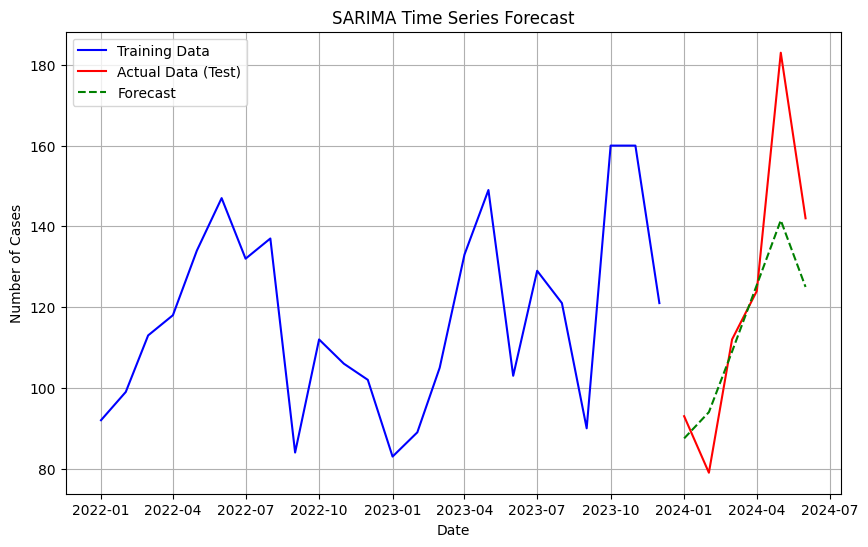

In [3]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드 및 전처리
file_path = 'C:/Users/비트캠프/Desktop/PYTHON/DACON/prediction/merged_df.xlsx'
merged_df = pd.read_excel(file_path)
merged_df['ds'] = pd.to_datetime(merged_df['ds'])
merged_df.set_index('ds', inplace=True)

# 데이터 분할
train_df = merged_df[merged_df.index <= '2023-12-31']
test_df = merged_df[(merged_df.index > '2023-12-31') & (merged_df.index <= '2024-06-30')]

# Holt-Winters 모델 학습 및 예측
model = ExponentialSmoothing(train_df['y'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_df))

# 평가 지표 계산
test_df['yhat'] = forecast.values
mae = mean_absolute_error(test_df['y'], test_df['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], test_df['yhat']))
r2 = r2_score(test_df['y'], test_df['yhat'])

print("Holt-Winters Model")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df['y'], label='Training Data', color='blue')
plt.plot(test_df.index, test_df['y'], label='Actual Data (Test)', color='red')
plt.plot(test_df.index, test_df['yhat'], label='Forecast', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('SARIMA Time Series Forecast')
plt.legend()
plt.grid(True)
plt.show()





Holt-Winters Model
MAE: 17.238749554420842
RMSE: 19.817034362516363
R²: 0.6668520097343449


C:\Users\비트캠프\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\비트캠프\AppData\Local\Temp\ipykernel_16352\1147645477.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['yhat'] = forecast[:len(test_df)].values  # 테스트 기간 동안의 예측 값


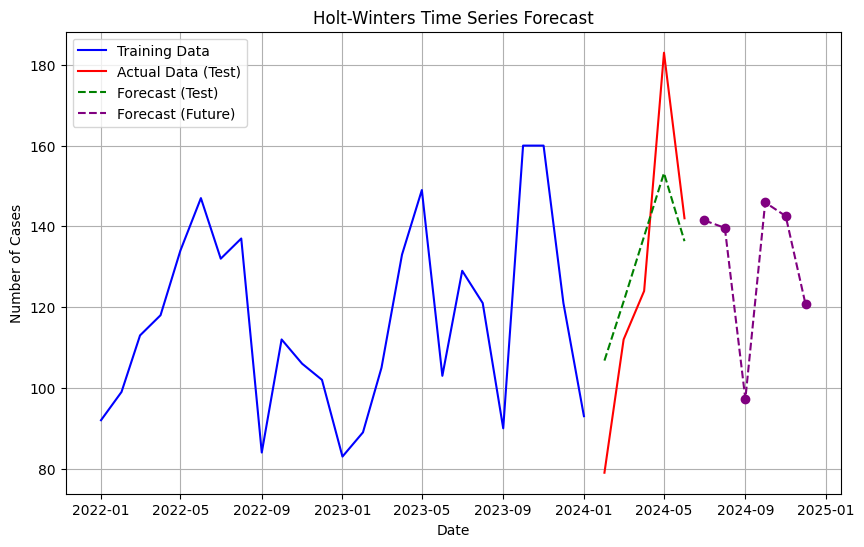

In [4]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드 및 전처리
file_path = 'C:/Users/비트캠프/Desktop/PYTHON/DACON/prediction/merged_df.xlsx'
merged_df = pd.read_excel(file_path)
merged_df = merged_df.dropna(subset=['y'])
merged_df['ds'] = pd.to_datetime(merged_df['ds'])
merged_df.set_index('ds', inplace=True)

# 데이터 분할
train_df = merged_df[merged_df.index <= '2024-01-31']
test_df = merged_df[(merged_df.index > '2024-01-31') & (merged_df.index <= '2024-06-30')]

# Holt-Winters 모델 학습 및 예측
model = ExponentialSmoothing(train_df['y'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()
forecast_steps = len(test_df) + 6  # 6개월 예측을 포함하도록 steps를 증가시킴
forecast = model_fit.forecast(steps=forecast_steps)

# 평가 지표 계산
test_df['yhat'] = forecast[:len(test_df)].values  # 테스트 기간 동안의 예측 값
mae = mean_absolute_error(test_df['y'], test_df['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], test_df['yhat']))
r2 = r2_score(test_df['y'], test_df['yhat'])

print("Holt-Winters Model")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# 7월부터 12월까지의 예측 값 추출
future_dates = pd.date_range(start='2024-07-01', periods=6, freq='MS')
future_forecast = forecast[len(test_df):].values
future_df = pd.DataFrame({'ds': future_dates, 'yhat': future_forecast})

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df['y'], label='Training Data', color='blue')
plt.plot(test_df.index, test_df['y'], label='Actual Data (Test)', color='red')
plt.plot(test_df.index, test_df['yhat'], label='Forecast (Test)', linestyle='--', color='green')
plt.plot(future_df['ds'], future_df['yhat'], label='Forecast (Future)', linestyle='--', color='purple')
plt.scatter(future_df['ds'], future_df['yhat'], color='purple', zorder=5)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Holt-Winters Time Series Forecast')
plt.legend()
plt.grid(True)
plt.show()


수두는 수두-대상포진 바이러스(varicella-zoster virus, VZV)에 의해 발생하는 전염성이 높은 질병입니다. 다음은 수두의 주요 특징과 발생 원인입니다.

### 특징
1. **발진 및 물집**: 수두는 특징적인 발진과 물집을 동반합니다. 처음에는 작은 빨간 반점이 생기며, 점차 물집으로 변합니다. 물집은 파열되어 딱지가 생깁니다.
2. **전신 증상**: 발진 외에도 발열, 피로, 두통, 근육통 등의 전신 증상이 나타날 수 있습니다.
3. **전염성**: 수두는 매우 전염성이 강합니다. 감염된 사람이 기침이나 재채기를 하거나, 발진 부위를 직접 접촉할 때 쉽게 전염될 수 있습니다.
4. **경과**: 수두는 일반적으로 어린이에게 경미한 질병으로 간주되지만, 성인이나 면역력이 약한 사람에게는 심각한 합병증을 유발할 수 있습니다.
5. **면역**: 한 번 수두에 걸린 후에는 대부분의 사람들이 평생 면역을 가지게 됩니다. 그러나 바이러스는 신경절에 잠복해 있다가 후에 대상포진으로 재발할 수 있습니다.

### 발생 원인
1. **바이러스 감염**: 수두는 수두-대상포진 바이러스(VZV)에 의해 발생합니다. 이 바이러스는 헤르페스 바이러스 군에 속합니다.
2. **전염 경로**: VZV는 감염된 사람의 호흡기 분비물(기침, 재채기 등)이나 발진 부위와의 직접 접촉을 통해 전파됩니다.
3. **면역력**: 면역력이 약한 사람, 특히 어린이, 임산부, 면역억제 치료를 받는 사람, HIV 감염자 등은 감염 위험이 높습니다.
4. **예방**: 수두 예방 접종을 통해 감염을 예방할 수 있습니다. 백신은 일반적으로 생후 12~15개월 사이에 첫 번째 접종을 하고, 4~6세 사이에 두 번째 접종을 합니다.

수두는 대부분의 경우 심각하지 않지만, 감염을 예방하고 합병증을 줄이기 위해 백신 접종이 중요합니다.

In [5]:
train_df

,y,일산화탄소,평균기온,평균최고기온,평균최저기온,강수량,평균상대습도,평균운량(10%),일조시간(hr),최심신적설(㎝),평균풍속(m/s),미세먼지,소아과개수,오존,이산화질소
ds,,,,,,,,,,,,,,,
2022-01-01,92.0,0.64,-2.2,2.6,-6.2,5.5,55.0,3.1,206.9,3.5,2.2,44,452,0.0158,0.0320
2022-02-01,99.0,0.53,-1.1,3.8,-5.3,4.7,55.0,3.2,203.8,3.3,2.6,40,452,0.0258,0.0258
2022-03-01,113.0,0.45,7.7,12.7,3.2,102.6,62.0,5.2,173.0,0.7,2.5,42,452,0.0275,0.0257
2022-04-01,118.0,0.41,14.8,20.6,10.0,20.4,55.0,4.1,246.4,0.0,2.7,45,454,0.0425,0.0196
2022-05-01,134.0,0.36,19.1,25.0,13.9,7.5,55.0,3.9,302.3,0.0,2.6,33,454,0.0488,0.0152
2022-06-01,147.0,0.33,23.3,27.5,19.8,393.8,73.0,6.9,131.9,0.0,2.5,22,454,0.0358,0.0132
2022-07-01,132.0,0.36,27.3,31.0,24.2,252.3,77.0,6.9,140.1,0.0,2.1,25,454,0.0368,0.0136
2022-08-01,137.0,0.34,25.7,28.9,23.1,564.8,80.0,7.3,116.3,0.0,2.3,20,454,0.0303,0.0132
2022-09-01,84.0,0.36,22.4,27.2,18.2,201.5,68.0,5.1,203.9,0.0,2.4,22,454,0.0304,0.0155


In [6]:
test_df

,y,일산화탄소,평균기온,평균최고기온,평균최저기온,강수량,평균상대습도,평균운량(10%),일조시간(hr),최심신적설(㎝),평균풍속(m/s),미세먼지,소아과개수,오존,이산화질소,yhat
ds,,,,,,,,,,,,,,,,
2024-02-01,79.0,0.51,3.8,8.2,0.2,74.7,72.9,6.0,109.3,8.6,2.5,33,459,0.0246,0.0246,106.764304
2024-03-01,112.0,0.42,7.0,12.0,2.4,29.9,57.2,4.1,190.6,0.0,2.7,49,459,0.0347,0.0212,121.407664
2024-04-01,124.0,0.43,16.3,22.4,11.5,33.2,56.2,4.8,209.2,0.0,2.4,50,459,0.0425,0.0215,137.551130
2024-05-01,183.0,0.35,18.5,23.7,13.8,125.1,63.2,4.2,262.0,0.0,2.4,30,459,0.0444,0.0156,153.192043
2024-06-01,142.0,0.35,24.6,30.1,19.9,115.9,60.5,4.2,285.6,0.0,2.2,31,459,0.0547,0.0153,136.337308



Forecast from July to December 2024:
        ds       yhat
2024-07-01 141.482430
2024-08-01 139.625774
2024-09-01  97.267760
2024-10-01 145.916233
2024-11-01 142.559294
2024-12-01 120.704919

Average of yhat from test and future predictions: 131.16


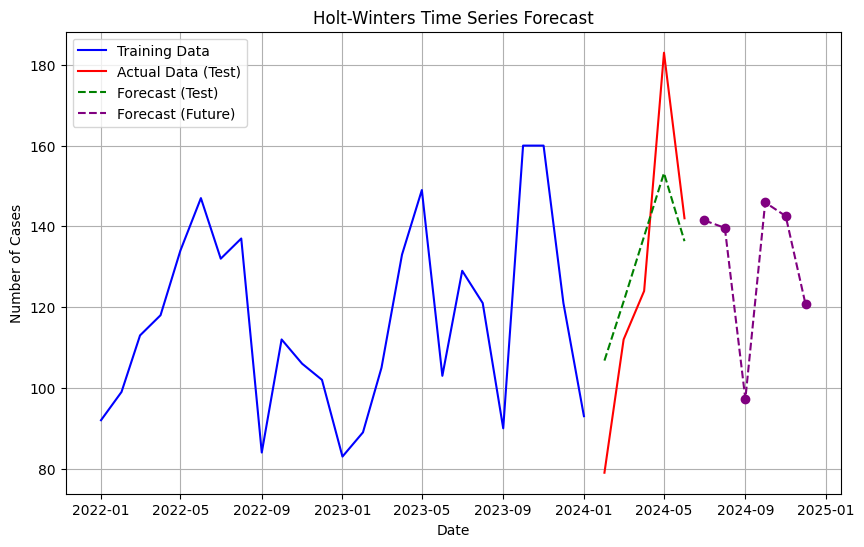

In [7]:

# 7월부터 12월까지의 예측 값 추출
future_dates = pd.date_range(start='2024-07-01', periods=6, freq='MS')
future_forecast = forecast[len(test_df):].values
future_df = pd.DataFrame({'ds': future_dates, 'yhat': future_forecast})

# 예측 결과를 텍스트로 변환
forecast_text = future_df.to_string(index=False)
print("\nForecast from July to December 2024:")
print(forecast_text)

# yhat의 평균 계산
yhat_mean = (test_df['yhat'].sum() + future_df['yhat'].sum()) / (len(test_df['yhat']) + len(future_df['yhat']))
print(f"\nAverage of yhat from test and future predictions: {yhat_mean:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df['y'], label='Training Data', color='blue')
plt.plot(test_df.index, test_df['y'], label='Actual Data (Test)', color='red')
plt.plot(test_df.index, test_df['yhat'], label='Forecast (Test)', linestyle='--', color='green')
plt.plot(future_df['ds'], future_df['yhat'], label='Forecast (Future)', linestyle='--', color='purple')
plt.scatter(future_df['ds'], future_df['yhat'], color='purple', zorder=5)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Holt-Winters Time Series Forecast')
plt.legend()
plt.grid(True)
plt.show()


Forecast from January to December 2024:
Date: 2024-01-01 00:00:00, Forecasted Cases: 108.32, Risk Level: 안전
Date: 2024-02-01 00:00:00, Forecasted Cases: 123.32, Risk Level: 보통
Date: 2024-03-01 00:00:00, Forecasted Cases: 139.82, Risk Level: 보통
Date: 2024-04-01 00:00:00, Forecasted Cases: 155.82, Risk Level: 위험
Date: 2024-05-01 00:00:00, Forecasted Cases: 139.32, Risk Level: 보통
Date: 2024-06-01 00:00:00, Forecasted Cases: 144.82, Risk Level: 위험
Date: 2024-07-01 00:00:00, Forecasted Cases: 143.32, Risk Level: 위험
Date: 2024-08-01 00:00:00, Forecasted Cases: 101.32, Risk Level: 안전
Date: 2024-09-01 00:00:00, Forecasted Cases: 150.32, Risk Level: 위험
Date: 2024-10-01 00:00:00, Forecasted Cases: 147.32, Risk Level: 위험
Date: 2024-11-01 00:00:00, Forecasted Cases: 125.82, Risk Level: 보통
Date: 2024-12-01 00:00:00, Forecasted Cases: 104.22, Risk Level: 안전


C:\Users\비트캠프\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


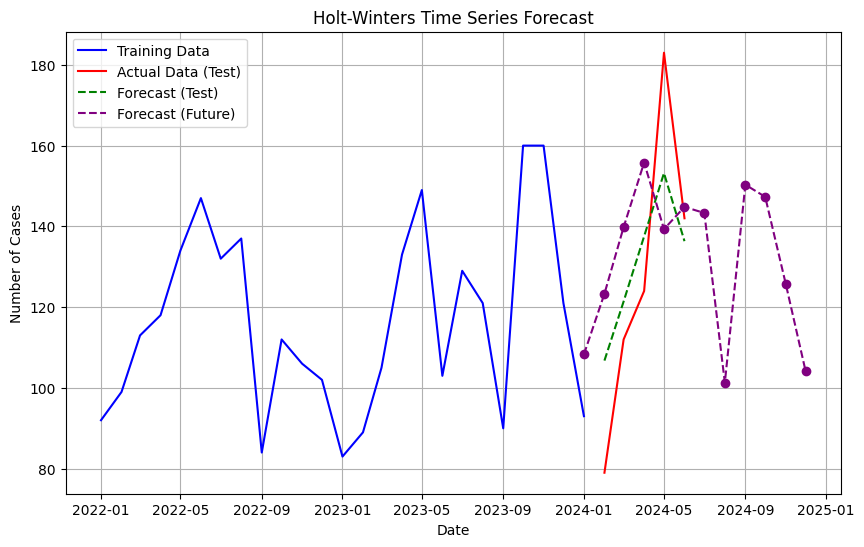

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 미래 날짜 생성
future_dates = pd.date_range(start='2024-01-01', periods=12, freq='MS')

# 2024년 1월부터 12월까지의 예측 수행
model = ExponentialSmoothing(train_df['y'], trend='add', seasonal='add', seasonal_periods=12).fit()
future_forecast = model.forecast(steps=12)
future_df = pd.DataFrame({'ds': future_dates, 'yhat': future_forecast})

# 2024년 6월까지의 yhat 평균 계산
yhat_mean = test_df['yhat'].mean()

# 오차 범위 설정 (±5%)
error_margin = yhat_mean * 0.07

# 예측 결과 출력 및 위험도 평가
print("\nForecast from January to December 2024:")
for index, row in future_df.iterrows():
    if row['yhat'] > yhat_mean + error_margin:
        risk_level = "위험"
    elif abs(row['yhat'] - yhat_mean) <= error_margin:
        risk_level = "보통"
    else:
        risk_level = "안전"
    print(f"Date: {row['ds']}, Forecasted Cases: {row['yhat']:.2f}, Risk Level: {risk_level}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df['y'], label='Training Data', color='blue')
plt.plot(test_df.index, test_df['y'], label='Actual Data (Test)', color='red')
plt.plot(test_df.index, test_df['yhat'], label='Forecast (Test)', linestyle='--', color='green')
plt.plot(future_df['ds'], future_df['yhat'], label='Forecast (Future)', linestyle='--', color='purple')
plt.scatter(future_df['ds'], future_df['yhat'], color='purple', zorder=5)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Holt-Winters Time Series Forecast')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# yhat_mean = test_df['yhat'].mean()
print(yhat_mean)

131.0504899445736


In [10]:
test_df

,y,일산화탄소,평균기온,평균최고기온,평균최저기온,강수량,평균상대습도,평균운량(10%),일조시간(hr),최심신적설(㎝),평균풍속(m/s),미세먼지,소아과개수,오존,이산화질소,yhat
ds,,,,,,,,,,,,,,,,
2024-02-01,79.0,0.51,3.8,8.2,0.2,74.7,72.9,6.0,109.3,8.6,2.5,33,459,0.0246,0.0246,106.764304
2024-03-01,112.0,0.42,7.0,12.0,2.4,29.9,57.2,4.1,190.6,0.0,2.7,49,459,0.0347,0.0212,121.407664
2024-04-01,124.0,0.43,16.3,22.4,11.5,33.2,56.2,4.8,209.2,0.0,2.4,50,459,0.0425,0.0215,137.551130
2024-05-01,183.0,0.35,18.5,23.7,13.8,125.1,63.2,4.2,262.0,0.0,2.4,30,459,0.0444,0.0156,153.192043
2024-06-01,142.0,0.35,24.6,30.1,19.9,115.9,60.5,4.2,285.6,0.0,2.2,31,459,0.0547,0.0153,136.337308


C:\Users\비트캠프\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\비트캠프\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\비트캠프\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\비트캠프\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN})

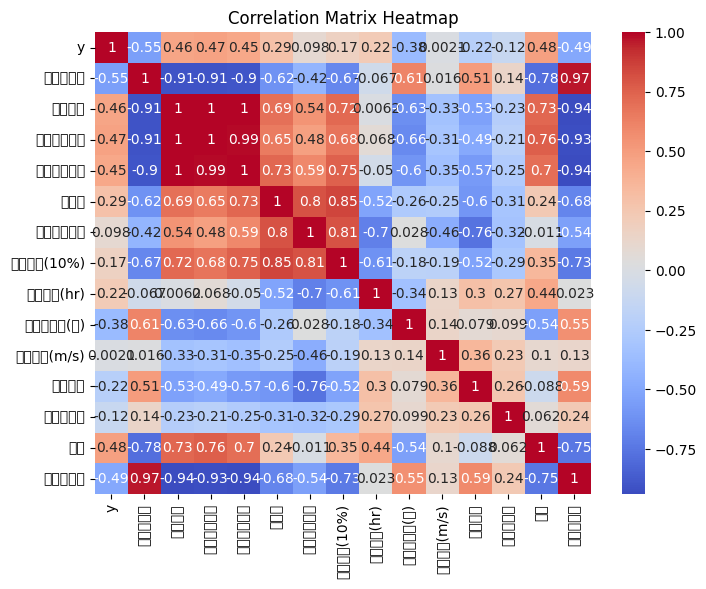

y         1.000000
일산화탄소     0.548068
이산화질소     0.492959
오존        0.477565
평균최고기온    0.474276
평균기온      0.461080
Name: y, dtype: float64

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드

# 기후 데이터와 수두 발생률 간의 상관 관계 분석
correlation_matrix = merged_df.corr()

# y와의 상관계수 추출 및 절대값 기준으로 정렬
y_correlations = correlation_matrix['y'].abs().sort_values(ascending=False)

# 상관계수 절대값이 높은 변수 출력
highest_corr_variables = y_correlations.head(6)
highest_corr_variables

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

highest_corr_variables


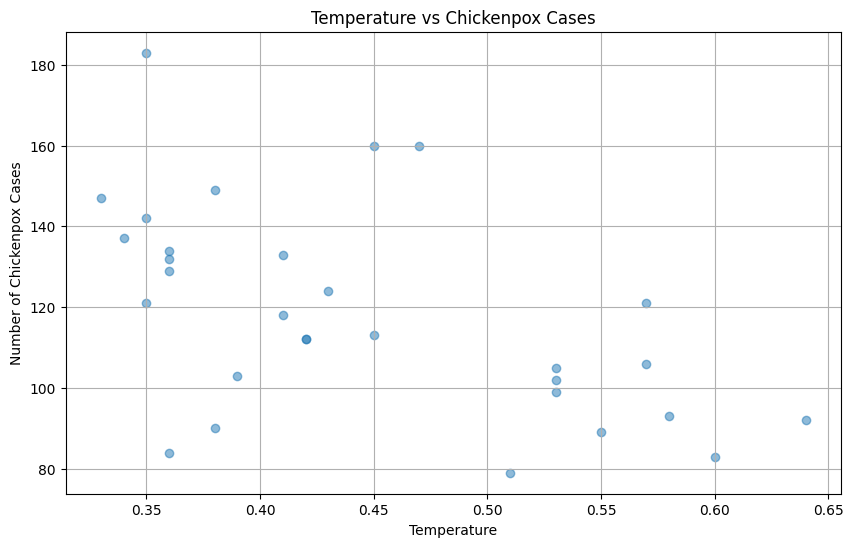

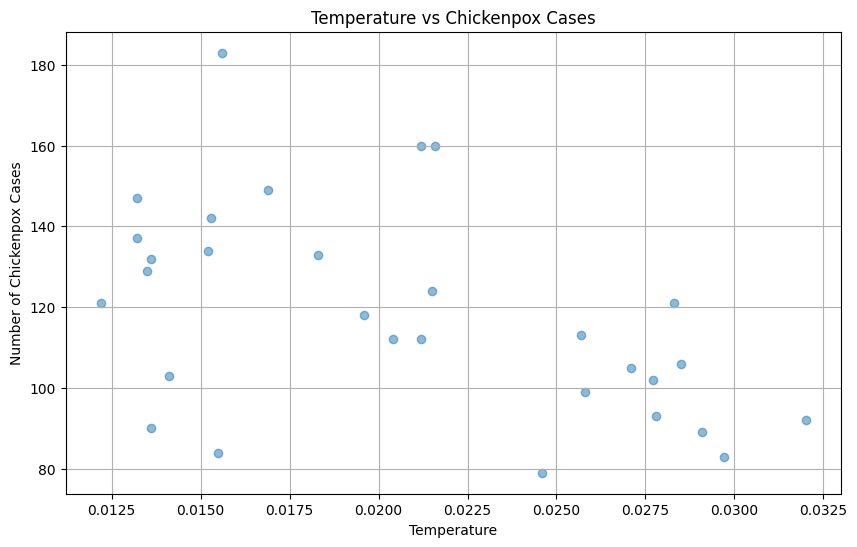

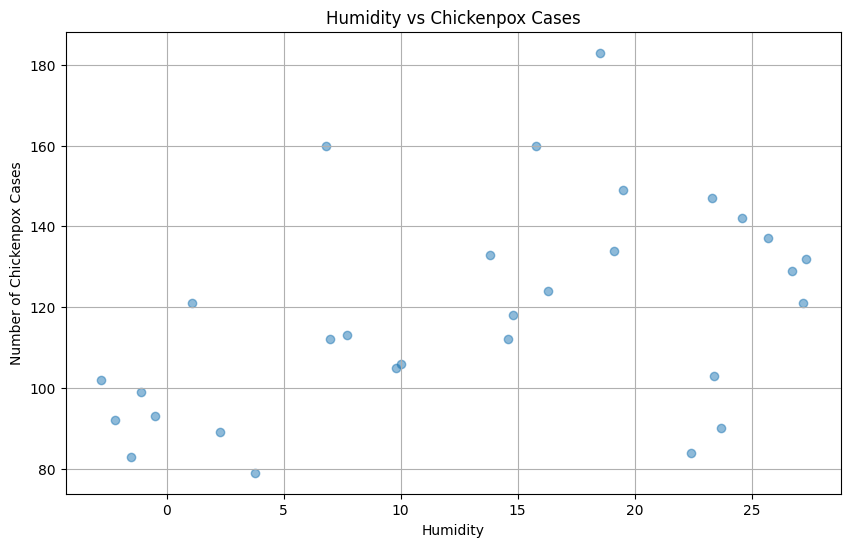

In [16]:
# 일산화탄소와 수두 발생률 시각화
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['일산화탄소'], merged_df['y'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Number of Chickenpox Cases')
plt.title('Temperature vs Chickenpox Cases')
plt.grid(True)
plt.show()

# 이산화질소와 수두 발생률 시각화
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['이산화질소'], merged_df['y'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Number of Chickenpox Cases')
plt.title('Temperature vs Chickenpox Cases')
plt.grid(True)
plt.show()


# 평균기온과 수두 발생률 시각화
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['평균기온'], merged_df['y'], alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Number of Chickenpox Cases')
plt.title('Humidity vs Chickenpox Cases')
plt.grid(True)
plt.show()